In [1]:
# required Python imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import funciones as f
from scipy.spatial.transform import Rotation as r

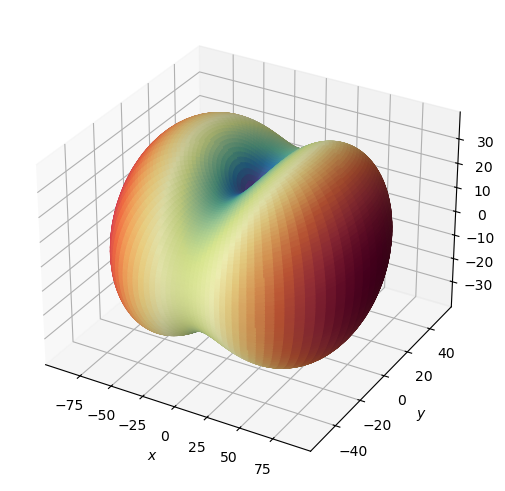

In [2]:
# generate a mesh of spherical/polar coordinates
polar, azimuths = f.regular_S2_grid(n_squared=100)

# estimate T values
T = f.Tvalues(trans=(90, 50, 20), azimuth=azimuths, polar=polar)

# convert from spherical to cartesian coordinates
x, y, z = f.sph2cart(T, azimuths, polar)

# normalize colors for T values to max and min values
Tmax, Tmin = T.max(), T.min()
Tcolors = (T - Tmin) / (Tmax - Tmin)

# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

In [3]:
# vealues for an euler orientation of [75 90 45]
test1 = np.array([[36.5, 0.3, 90],
                  [45.9, 17.9, 90],
                  [51.9, 35.9, 90],
                  [51.9, 54.1, 90],
                  [45.9, 72.1, 90 ],
                  [36.3, 90.0, 90]])

# vealues for an euler orientation of [0 0 0]
test2 = np.array([[90.0, 0.0, 90],
                  [86.2, 18.09, 90],
                  [76.1, 36.1, 90],
                  [63.7, 54.1, 90],
                  [53.8, 72.1, 90 ],
                  [50.0, 90.2, 90]])

# transform to coordinates
x1, y1, z1 = f.sph2cart(test1[:, 0], azimuth=np.deg2rad(test1[:, 1]), polar=np.deg2rad(test1[:, 2]))
x2, y2, z2 = f.sph2cart(test2[:, 0], azimuth=np.deg2rad(test2[:, 1]), polar=np.deg2rad(test2[:, 2]))

In [4]:
%matplotlib qt


In [5]:
%matplotlib inline

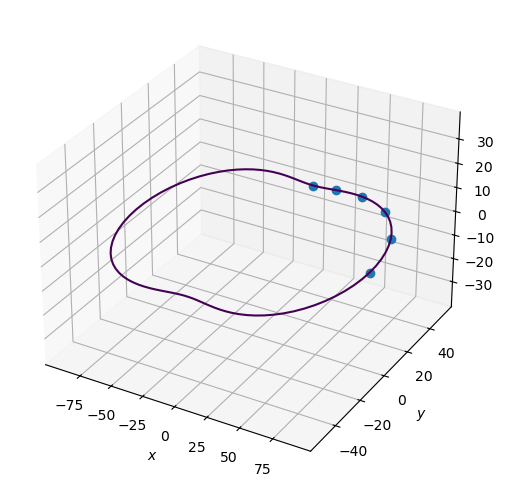

In [6]:
# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

#ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors), alpha=0.1)

# plot the contour z=0 of the transmission figure
ax.contour(x, y, z, [0])

# plot input data (fake mesurements)
ax.plot(np.around(x2, 1),
        np.around(y2, 1),
        np.around(z2, 1),
        'o')

_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

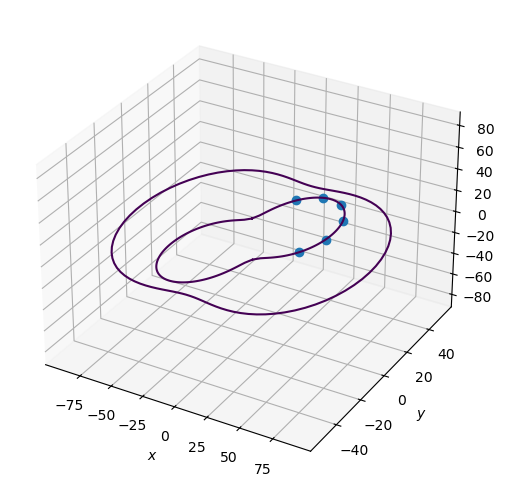

In [7]:
xr, yr, zr = f.rotate(coordinates=(x, y, z), euler_ang=(75, 90, 45))
xr2, yr2, zr2 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 125, 80))

# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
#ax.plot_surface(xr, yr, zr, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors), alpha=0.1)

# plot the contour z=0 of the transmission figure (for different orientations)
ax.contour(x, y, z, [0])     # euler (0,0,0)
ax.contour(xr, yr, zr, [0])  # euler (75,90,45), i.e. the real solution

# plot input data (fake mesurements)
ax.plot(np.around(x1, 1),
        np.around(y1, 1),
        np.around(z1, 1),
        'o')

_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

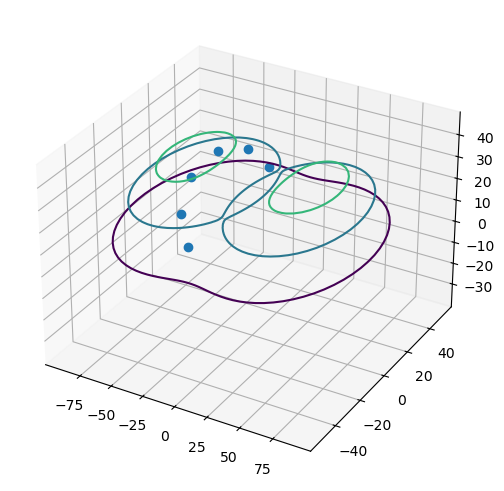

In [8]:
x1rot, y1rot, z1rot = f.rotate(coordinates=(x1, y1, z1), euler_ang=(75, 90, 45))

# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot(x1rot.ravel(), y1rot.ravel(), z1rot.ravel(), 'o')

ax.contour(x, y, z, np.sort(z1rot.ravel()))



In [9]:
f.cart2sph(x1rot, y1rot, z1rot)

(array([36.5, 45.9, 51.9, 51.9, 45.9, 36.3]),
 array([0.78539816, 3.92699082, 3.92699082, 3.92699082, 3.92699082,
        3.92699082]),
 array([0.2565634 , 0.05061455, 0.36477381, 0.68242374, 0.996583  ,
        1.30899694]))

In [10]:
test3 = np.array([[90.0, 0.0, 90],
                  [50.0, 90.0, 90],
                  [20.0, 0.0, 0.0]])
x3, y3, z3 = f.sph2cart(test3[:, 0], azimuth=np.deg2rad(test3[:, 1]), polar=np.deg2rad(test3[:, 2]))

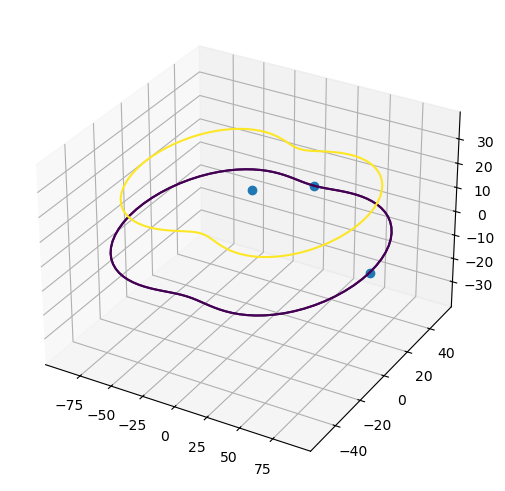

In [11]:
# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot(x3.ravel(), y3.ravel(), z3.ravel(), 'o')
ax.contour(x, y, z, np.sort(z3.ravel()))

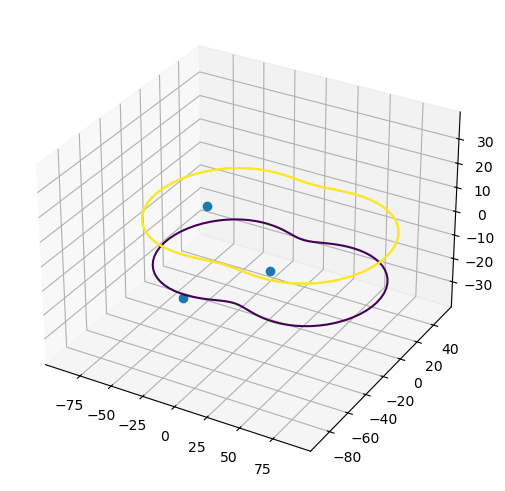

In [12]:
x3rot, y3rot, z3rot = f.rotate(coordinates=(x3, y3, z3), euler_ang=(90, 180, 0))

# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot(x3rot.ravel(), y3rot.ravel(), z3rot.ravel(), 'o')
ax.contour(x, y, z, np.sort(z3rot.ravel()))

In [13]:
T3, azi3, polar3 = f.cart2sph(x3rot, y3rot, z3rot)
print('Ts', T3)
print('azimuths', np.rad2deg(azi3))
print('polar', np.rad2deg(polar3))
print('azimuths', azi3)
print('polar', polar3)

Ts [90. 50. 20.]
azimuths [270. 180.   0.]
polar [ 90.  90. 180.]
azimuths [4.71238898 3.14159265 0.        ]
polar [1.57079633 1.57079633 3.14159265]


---

In [14]:
np.vstack((x1, y1, z1)).T

array([[3.64994997e+01, 1.91112680e-01, 2.23498041e-15],
       [4.36781831e+01, 1.41076688e+01, 2.81056440e-15],
       [4.20411611e+01, 3.04327253e+01, 3.17795844e-15],
       [3.04327253e+01, 4.20411611e+01, 3.17795844e-15],
       [1.41076688e+01, 4.36781831e+01, 2.81056440e-15],
       [2.22273394e-15, 3.63000000e+01, 2.22273394e-15]])

In [15]:
np.dstack((x1, y1, z1)).shape, test1.shape, np.vstack((x1, y1, z1)).T.shape

((1, 6, 3), (6, 3), (6, 3))

In [16]:
rotation = r.from_euler('zxz', (75, 90, 45), degrees=True)
new_coordinates = np.vstack((x1, y1, z1)).T @ rotation.as_matrix().T

In [17]:
new_coordinates

array([[  6.54933966,   6.54933966,  35.30527298],
       [ -1.64205465,  -1.64205465,  45.84121849],
       [-13.09187145, -13.09187145,  48.48521222],
       [-23.14507177, -23.14507177,  40.27680853],
       [-27.2508713 , -27.2508713 ,  24.93170725],
       [-24.79336108, -24.79336108,   9.39513134]])

In [18]:
new_coordinates[:, 0]

array([  6.54933966,  -1.64205465, -13.09187145, -23.14507177,
       -27.2508713 , -24.79336108])

In [19]:
x1rot.flatten(), y1rot, z1rot.ravel()

(array([  6.54933966,  -1.64205465, -13.09187145, -23.14507177,
        -27.2508713 , -24.79336108]),
 array([  6.54933966,  -1.64205465, -13.09187145, -23.14507177,
        -27.2508713 , -24.79336108]),
 array([35.30527298, 45.84121849, 48.48521222, 40.27680853, 24.93170725,
         9.39513134]))

In [20]:
np.sort(z1rot.ravel())

array([ 9.39513134, 24.93170725, 35.30527298, 40.27680853, 45.84121849,
       48.48521222])

In [21]:
np.vstack((x1, y1, z1))

array([[3.64994997e+01, 4.36781831e+01, 4.20411611e+01, 3.04327253e+01,
        1.41076688e+01, 2.22273394e-15],
       [1.91112680e-01, 1.41076688e+01, 3.04327253e+01, 4.20411611e+01,
        4.36781831e+01, 3.63000000e+01],
       [2.23498041e-15, 2.81056440e-15, 3.17795844e-15, 3.17795844e-15,
        2.81056440e-15, 2.22273394e-15]])

In [22]:
np.vstack((x1, y1, z1)).T

array([[3.64994997e+01, 1.91112680e-01, 2.23498041e-15],
       [4.36781831e+01, 1.41076688e+01, 2.81056440e-15],
       [4.20411611e+01, 3.04327253e+01, 3.17795844e-15],
       [3.04327253e+01, 4.20411611e+01, 3.17795844e-15],
       [1.41076688e+01, 4.36781831e+01, 2.81056440e-15],
       [2.22273394e-15, 3.63000000e+01, 2.22273394e-15]])

In [23]:
rotation.as_matrix().shape, np.dstack((x,y,z)).shape, np.vstack((x1, y1, z1)).T.shape

((3, 3), (100, 100, 3), (6, 3))

In [24]:
x.ndim, x1.ndim

(2, 1)